In [0]:
!pip install python-mnist

  Running setup.py bdist_wheel for python-mnist ... - done
  Stored in directory: /root/.cache/pip/wheels/28/29/36/408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [0]:
import tensorflow as tf

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
from mnist import MNIST
mndata = MNIST('./drive/gzip3')
mndata.select_emnist('balanced')
train_dataset, train_labels = mndata.load_training()
test_dataset, test_labels = mndata.load_testing()


In [0]:
import numpy as np
train_dataset = np.array(train_dataset)
train_dataset = train_dataset.reshape(len(train_dataset),28,28)
test_dataset = np.array(test_dataset)
test_dataset = test_dataset.reshape(len(test_dataset),28,28)

In [0]:
# 소문자의 dataset과 label만 분리
selected_lower = [1, 2, 4, 5, 6, 7, 8, 14, 17, 18, 20]
selected_upper = [3, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22, 23, 24, 25, 26]
adjust_lower = [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
adjust_upper = []


for i in range(len(selected_upper)):
  adjust_upper.append(selected_upper[i] + 9)
  
a = []
b = []
c = []

for index, val in enumerate(train_labels):
  if val in adjust_lower:
    a.append(index)
    for i in range(len(selected_lower)):
      if adjust_lower[i] == val:
        b.append(selected_lower[i])
        break
  if val in adjust_upper:
    a.append(index)
    b.append(val-9) 
   
for i in a:
  val = train_dataset[i]
  c.append(val)
  
train_dataset = c
train_labels = b

In [0]:
selected_lower = [1, 2, 4, 5, 6, 7, 8, 14, 17, 18, 20]
selected_upper = [3, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22, 23, 24, 25, 26]
adjust_lower = [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
adjust_upper = []



for i in range(len(selected_upper)):
  adjust_upper.append(selected_upper[i] + 9)
  
a = []
b = []
c = []

for index, val in enumerate(test_labels):
  if val in adjust_lower:
    a.append(index)
    for i in range(len(selected_lower)):
      if adjust_lower[i] == val:
        b.append(selected_lower[i])
        break
  if val in adjust_upper:
    a.append(index)
    b.append(val-9) 
   
for i in a:
  val = test_dataset[i]
  c.append(val)
  
test_dataset = c
test_labels = b

In [0]:

#make blank dataset
blank = np.zeros((500,28,28),dtype='i')
blank_labels = np.zeros(500,dtype='i')

train_dataset = np.append(blank,train_dataset,axis=0)
test_dataset = np.append(blank,test_dataset,axis=0)
train_labels = np.append(blank_labels,train_labels)
test_labels = np.append(blank_labels,test_labels)


==== For training ====
[17 16 16  2  3 20  2 13 22  2]


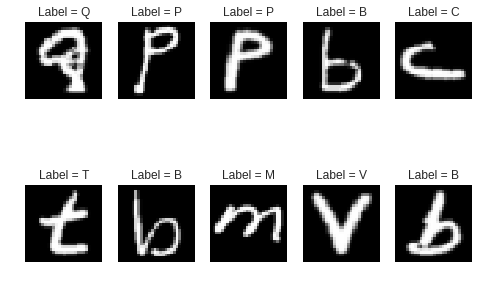

In [0]:
import random
import matplotlib.pyplot as plt
Row = 2
Column = 5
ListOfLabel = [' ','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print("==== For training ====")
rand = random.randint(0, 29989)
images = train_dataset[rand:rand+10]
labels = train_labels[rand:rand+10]
print(labels)
for i, image in enumerate(images):
    plt.subplot(Row, Column, i+1)
    plt.title('Label = {}'.format(ListOfLabel[labels[i]]))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

In [0]:
from __future__ import print_function

import os
from six.moves import range
from six.moves import cPickle as pickle

import matplotlib.pyplot as plt

In [0]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [0]:
image_size = 28
num_labels = 27
train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)

#Reshape training and testing image
train_X = train_dataset.reshape(-1, 28, 28, 1)
test_X = test_dataset.reshape(-1, 28, 28, 1)
train_y = (np.arange(num_labels) == train_labels[:,None])
test_y = (np.arange(num_labels) == test_labels[:,None])
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)



(62900, 28, 28, 1) (10900, 28, 28, 1)
(62900, 27) (10900, 27)


In [0]:
training_iters = 300
learning_rate = 0.00001
batch_size = 128

# data input (img shape: 28*28)
n_input = 28

# total classes (alphabet)
n_classes = 27

In [0]:
# both placeholders are of type float
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

In [0]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [0]:
weights = {
    'wc1': tf.get_variable('11', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('21', shape=(3,3,32,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('31', shape=(14*14*32,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd2': tf.get_variable('41', shape=(7*7*32,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('51', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer())
}
biases = {
    'bc1': tf.get_variable('b11', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('b21', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bd2': tf.get_variable('b31', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('b41', shape=(n_classes), initializer=tf.contrib.layers.xavier_initializer())
}

In [0]:
def conv_net(x, weights, biases):  

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = tf.nn.relu(conv1)
    # choose the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = maxpool2d(conv2, k=2)
    
    

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd2'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc1 = tf.nn.relu(fc1)
    
    # Output, class prediction
    # Multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [0]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Check whether the index of the maximum value of the predicted image is equal to the actual labelled image
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# calculate accuracy across all the given images
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Initializing the variables
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op.
            opt = sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x:batch_x,y:batch_y})

        print("Iter " + str(i+1) + ", Loss= " + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))

        # Calculate accuracy for all test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x:test_X,y :test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    #save
    saver = tf.train.Saver()
    saver.save(sess, './drive/gzip3/model2.ckpt')
    summary_writer.close()

Iter 1, Loss= 5.717308, Training Accuracy= 0.35156
Testing Accuracy: 0.28101
Iter 2, Loss= 3.259284, Training Accuracy= 0.48438
Testing Accuracy: 0.45679
Iter 3, Loss= 2.440984, Training Accuracy= 0.61719
Testing Accuracy: 0.53826
Iter 4, Loss= 2.006765, Training Accuracy= 0.66406
Testing Accuracy: 0.58789
Iter 5, Loss= 1.718520, Training Accuracy= 0.66406
Testing Accuracy: 0.62275
Iter 6, Loss= 1.499095, Training Accuracy= 0.67188
Testing Accuracy: 0.65156
Iter 7, Loss= 1.350771, Training Accuracy= 0.70312
Testing Accuracy: 0.67018
Iter 8, Loss= 1.232588, Training Accuracy= 0.71094
Testing Accuracy: 0.68789
Iter 9, Loss= 1.142183, Training Accuracy= 0.71875
Testing Accuracy: 0.70202
Iter 10, Loss= 1.059018, Training Accuracy= 0.74219
Testing Accuracy: 0.71633
Iter 11, Loss= 0.986722, Training Accuracy= 0.75781
Testing Accuracy: 0.72624
Iter 12, Loss= 0.924627, Training Accuracy= 0.77344
Testing Accuracy: 0.73927
Iter 13, Loss= 0.871552, Training Accuracy= 0.77344
Testing Accuracy: 0.7

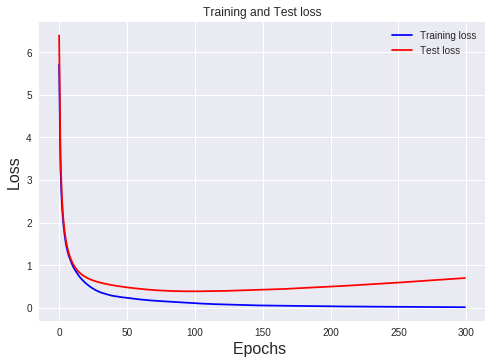

In [0]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

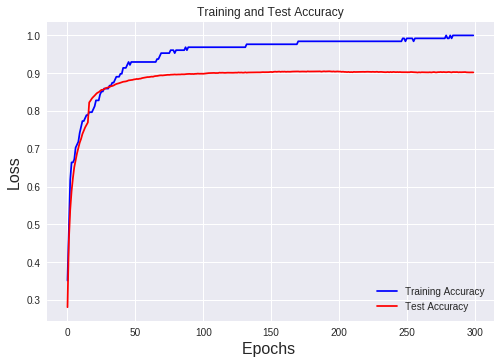

In [0]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()